In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import streamlit as st
import geopandas as gpd
import plotly.express as px
import folium

In [5]:
f1s1.head()

,Time (secs),[3d Latitude],[3d Longitude],[3d Altitude M],[3d Altitude Ft],[3d Heading],TRUE AIRSPEED (derived)
0,1.00,52.303928,4.765694,-1.2,-4.0,122.6,47.3
1,1.25,52.303928,4.765694,-1.2,-4.0,122.6,NaN
2,1.50,52.303928,4.765694,-1.2,-4.0,122.6,NaN
3,1.75,52.303928,4.765694,-1.2,-4.0,122.6,NaN
4,2.00,52.303928,4.765694,-1.2,-4.0,122.6,47.3


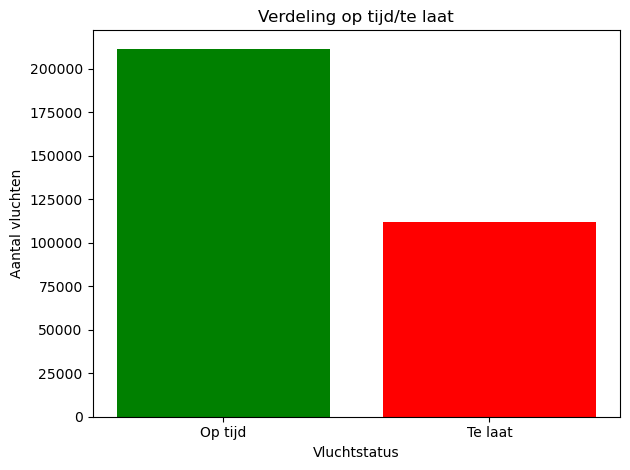

34.64% van de vluchten is te laat


In [57]:
# importeer libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# laad dataframe schedule_airport.csv in als schedule
schedule = pd.read_csv('schedule_airport.csv')

# maakt dataframe verschil (vs) aan met de geplande aankomst tijd en de werkelijke aankomst tijd
vs = pd.DataFrame({'gepland':schedule['STA_STD_ltc'],'aankomst': schedule['ATA_ATD_ltc']})

# verandert de values in vs naar het juiste format
fmt = '%H:%M:%S'
vs['gepland'] = pd.to_datetime(vs['gepland'], format=fmt)
vs['aankomst'] = pd.to_datetime(vs['aankomst'], format=fmt)

# berekent het verschil tussen de geplande aankost tijd en de daadwerkelijke aankomst tijd en zet die waardes in de nieuwe kolom verschil
vs['verschil'] = np.where(vs['gepland'] > vs['aankomst'], 
                        vs['gepland'] - vs['aankomst'], 
                        vs['aankomst'] - vs['gepland'])

# maakt een nieuwe kolom 'op tijd?' waarin staat of de vlucht op tijd of te laat aan is gekomen
vs['op tijd?'] = np.where(vs['gepland'] > vs['aankomst'], 'op tijd', 'te laat')

# telt het aantal vluchten dat op tijd is en dat te laat is
counts = vs['op tijd?'].value_counts()

# maakt een bar chart die het aantal vluchten wat optijd is en het aantal vluchten wat te laat is tegen elkaar uit
plt.bar(counts.index, counts, color=['green', 'red'])
plt.xlabel('Vluchtstatus')
plt.ylabel('Aantal vluchten')
plt.title('Verdeling op tijd/te laat')

# maakt tick labels voor de leesbaarheid
plt.xticks([1, 0], ['Te laat', 'Op tijd'], rotation=0)

# geeft de grafiek weer
plt.tight_layout()
plt.show()

# berekent het percentage van vluchten die te laat aankomen
percentage_late = (counts[1] / len(vs)) * 100
print(f"{percentage_late:.2f}% van de vluchten is te laat")

In [36]:
# importeer libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
# laad dataframe schedule_airport.csv in als schedule
schedule = pd.read_csv('schedule_airport.csv')

In [38]:
# maakt dataframe verschil (vs) aan met de geplande aankomst tijd en de werkelijke aankomst tijd
vs = pd.DataFrame({'gepland':schedule['STA_STD_ltc'],'aankomst': schedule['ATA_ATD_ltc']})

In [39]:
# verandert de values in vs naar het juiste format
fmt = '%H:%M:%S'
vs['gepland'] = pd.to_datetime(vs['gepland'], format=fmt)
vs['aankomst'] = pd.to_datetime(vs['aankomst'], format=fmt)

In [40]:
# berekent het verschil tussen de geplande aankost tijd en de daadwerkelijke aankomst tijd en zet die waardes in de nieuwe kolom verschil
vs['verschil'] = np.where(vs['gepland'] > vs['aankomst'], 
                        vs['gepland'] - vs['aankomst'], 
                        vs['aankomst'] - vs['gepland'])

In [52]:
# maakt een nieuwe kolom 'op tijd?' waarin staat of de vlucht op tijd of te laat aan is gekomen
vs['op tijd?'] = np.where(vs['gepland'] > vs['aankomst'], 'op tijd', 'te laat')

In [53]:
# telt het aantal vluchten dat op tijd is en dat te laat is
counts = vs['op tijd?'].value_counts()

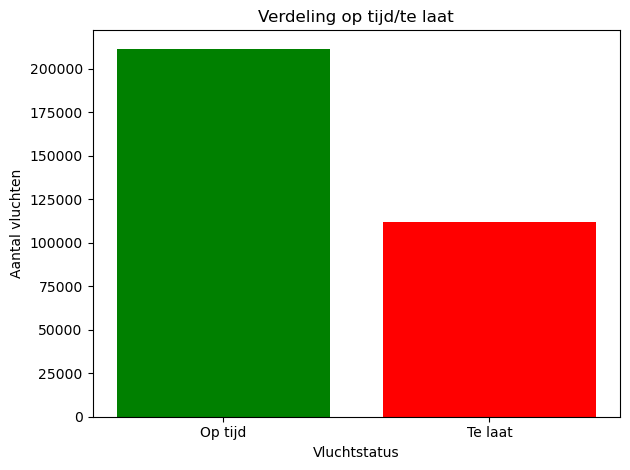

In [55]:
# maakt een bar chart die het aantal vluchten wat optijd is en het aantal vluchten wat te laat is tegen elkaar uit
plt.bar(counts.index, counts, color=['green', 'red'])
plt.xlabel('Vluchtstatus')
plt.ylabel('Aantal vluchten')
plt.title('Verdeling op tijd/te laat')

# maakt tick labels voor de leesbaarheid
plt.xticks([1, 0], ['Te laat', 'Op tijd'], rotation=0)

# geeft de grafiek weer
plt.tight_layout()
plt.show()

In [46]:
# berekent het percentage van vluchten die te laat aankomen
percentage_late = (counts[0] / len(vs)) * 100
print(f"{percentage_late:.2f}% van de vluchten is te laat")

65.36% van de vluchten is te laat
